# Import des bibliothèques nécessaires

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score

# Chargement des données à partir du fichier CSV

In [2]:
df = pd.read_csv('./input/credit-g_csv.csv')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


# Analyse exploratoire des données

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


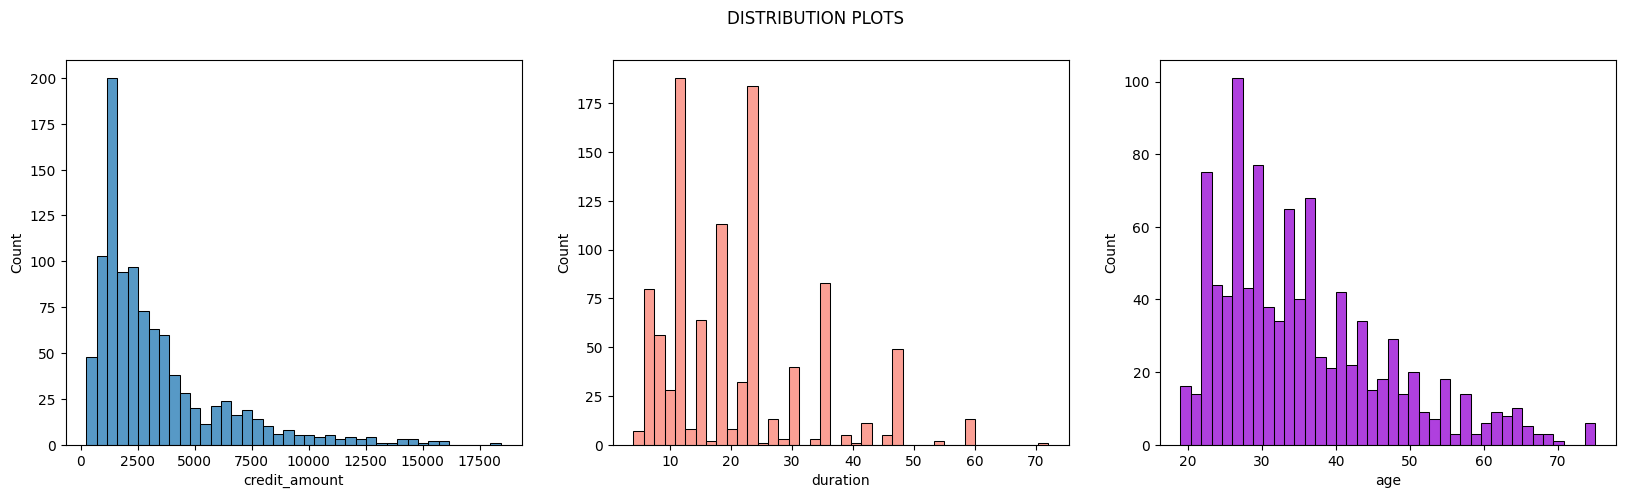

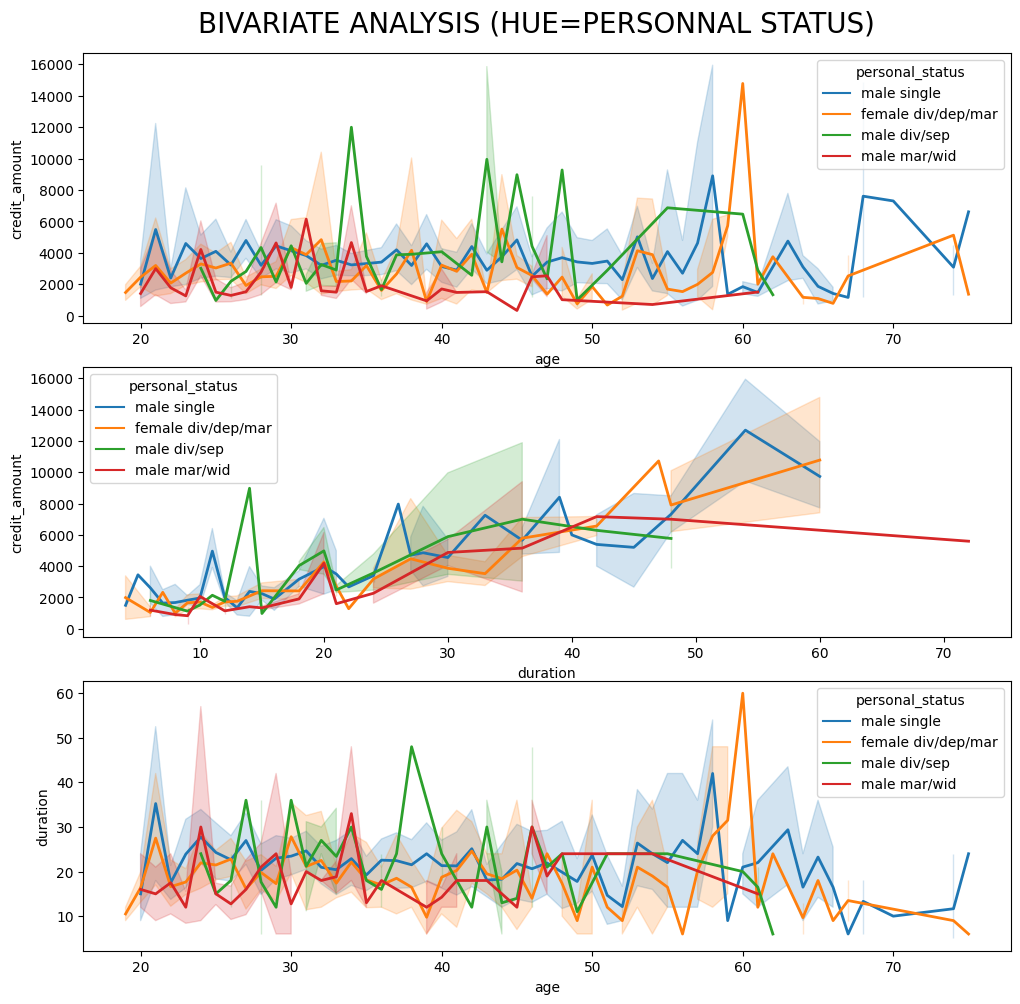

In [4]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('DISTRIBUTION PLOTS')
sns.histplot(df['credit_amount'], bins=40, ax=ax[0]);
sns.histplot(df['duration'], bins=40, ax=ax[1], color='salmon');
sns.histplot(df['age'], bins=40, ax=ax[2], color='darkviolet');

fig, ax = plt.subplots(3,1,figsize=(10,10))
plt.suptitle('BIVARIATE ANALYSIS (HUE=PERSONNAL STATUS)', fontsize=20)
# plt.tight_layout(2)
plt.tight_layout()

sns.lineplot(data=df, x='age', y='credit_amount', hue='personal_status', lw=2, ax=ax[0]);
sns.lineplot(data=df, x='duration', y='credit_amount', hue='personal_status', lw=2, ax=ax[1]);
sns.lineplot(data=df, x='age', y='duration', hue='personal_status', lw=2, ax=ax[2]);

# Pré-traitement des données

In [5]:
# from sklearn.preprocessing import LabelEncoder

# # Étape 1 : Traitement des valeurs manquantes
# # Trouver les colonnes avec des valeurs manquantes
# cols_with_missing = [col for col in df.columns if df[col].isnull().any()]
# # Si une colonne a des valeurs manquantes, remplacer les valeurs manquantes avec la médiane de la colonne
# for col in cols_with_missing:
#     df[col].fillna(df[col].median(), inplace=True)

# # Étape 2 : Encodage des variables catégorielles
# # Trouver les colonnes avec des variables catégorielles
# cat_cols = ["checking_status","credit_history","purpose","savings_status","employment","personal_status","other_parties","property_magnitude","other_payment_plans","housing","job","own_telephone","foreign_worker","class"]
# # cat_cols = ["checking_status","credit_history","purpose","savings_status","employment","personal_status","other_parties","property_magnitude","other_payment_plans","housing","job","own_telephone","foreign_worker"]
# # Encoder les variables catégorielles en utilisant LabelEncoder
# label_encoder = LabelEncoder()
# df['class']
# label_encoder.fit(df['class'])
# for col in cat_cols:
#     df[col] = label_encoder.fit_transform(df[col])

# label_encoder.classes_


#### Étape 1 : Traitement des valeurs manquantes
##### Trouver les colonnes avec des valeurs manquantes

In [6]:
cat_cols = ["checking_status","credit_history","purpose","savings_status","employment","personal_status","other_parties","property_magnitude","other_payment_plans","housing","job","own_telephone","foreign_worker","class"]
cols_with_missing = [col for col in df.columns if df[col].isnull().any()]

##### Si une colonne a des valeurs manquantes, remplacer les valeurs manquantes avec la médiane de la colonne

In [7]:
for col in cols_with_missing:
    df[col].fillna(df[col].median(), inplace=True)

### Étape 2 : Encodage des variables catégorielles
#### Encoder les variables target avec LabelEncoder 

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(df['class'])
label_encoder.classes_

array(['bad', 'good'], dtype=object)

##### Encoder les variables input avec OrdinalEncoder

In [9]:
from sklearn.preprocessing import OrdinalEncoder

# Séparation des features et du output

In [10]:
X = df.drop('class', axis=1)
y = df['class']

enc = OrdinalEncoder()
X = enc.fit_transform(X)


# Visualization

In [11]:
y.value_counts()

class
good    700
bad     300
Name: count, dtype: int64

##### Remark: we have imbalanced classes. that likely will affect the outcome of our model

<Axes: ylabel='count'>

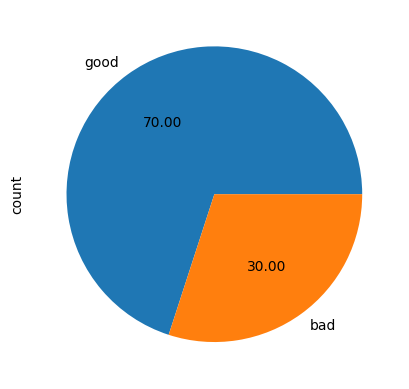

In [12]:
y.value_counts().plot.pie(autopct = '%.2f')

# Solutions
##  - Random Undersampling 
#####   not minority => resample all clases but the minority classes

<Axes: ylabel='count'>

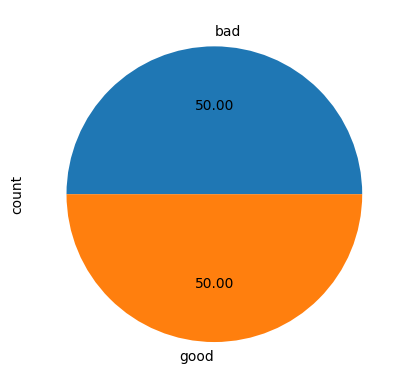

In [13]:
from imblearn.under_sampling import  RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1)
X_res, y_res = rus.fit_resample(X,y)

y_res.value_counts().plot.pie(autopct = '%.2f')

##  - Random OverSampling
#####   not majority => resample all clases but the majority classes

<Axes: ylabel='count'>

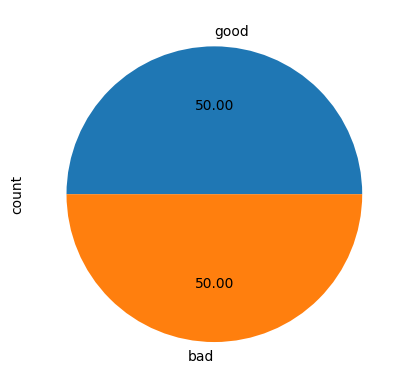

In [14]:
from imblearn.over_sampling import  RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1)
X_res, y_res = ros.fit_resample(X,y)

y_res.value_counts().plot.pie(autopct = '%.2f')

# Balance using SMOTE

In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X,y)

# Standardization

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_scaled = scaler.fit_transform(X_res)
X_scaled = scaler.fit_transform(X_resampled)

# Séparation des données en ensembles d'apprentissage et de test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)


# Créer une instance de modèle

In [18]:
fitted_y_train = label_encoder.fit_transform(y_train)
cost_matrix = [[0, 1], [5, 0]]

# Calculate class weights from the cost matrix

# model = LogisticRegression()
# model = LogisticRegression(class_weight='balanced')
# model = XGBClassifier()
model = DecisionTreeClassifier()
# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, fitted_y_train)
# Prédire les valeurs cibles pour les données de test
y_pred = model.predict(X_test)

# svc = SVC(kernel='linear', class_weight='balanced')
# svc.fit(X_train, y_train, sample_weight=[cost_matrix[y] for y in fitted_y_train])
# y_pred = svc.predict(X_test)

# Calculer la précision

In [19]:
fitted_y_test = label_encoder.fit_transform(y_test)
accuracy = accuracy_score(fitted_y_test, y_pred)
print('Accuracy:', accuracy)
print(classification_report(label_encoder.fit_transform(y_test), y_pred))

Accuracy: 0.7535714285714286
              precision    recall  f1-score   support

           0       0.72      0.79      0.75       131
           1       0.79      0.72      0.76       149

    accuracy                           0.75       280
   macro avg       0.75      0.76      0.75       280
weighted avg       0.76      0.75      0.75       280



# Prédire de nouvelles entrée

In [20]:
new_data = pd.DataFrame({
    'checking_status': ['<0', '0<=X<200', 'no checking', '0<=X<200', 'no checking'], 'duration': [12, 24, 12, 6, 24], 
    'credit_history': ['existing paid', 'existing paid', 'critical/other existing credit','no credits/all paid', 'critical/other existing credit'],
    'purpose': ['new car', 'used car', 'education', 'education', 'new car'], 'credit_amount': [1295, 12579, 2096, 10000, 1000], 
    'savings_status': ['<100', '<100', '<100', '500<=X<1000', '<100'],
    'employment': ['<1', '>=7', '4<=X<7', '>=7', '<1'], 'installment_commitment': [3, 4, 2, 2, 1], 
    'personal_status': ['female div/dep/mar', 'none', 'male single', 'male single', 'female div/dep/mar'],
    'other_parties': ['none', 'none', 'none', 'guarantor', 'none'], 'residence_since': [1, 2, 1, 2, 1], 
    'property_magnitude': ['car', 'no known property', 'real estate', 'real estate', 'no known property'],
    'age': [25, 44, 49, 30, 40], 'other_payment_plans': ['none', 'none', 'none', 'stores', 'none'], 
    'housing': ['rent', 'for free', 'own', 'own', 'rent'],
    'existing_credits': [1, 1, 1, 0, 3], 'job': ['skilled', 'high qualif/self emp/mgmt', 'unskilled resident', 'skilled', 'unskilled resident',], 
    'num_dependents': [1, 1, 2, 1, 2],
    'own_telephone': ['yes', 'yes', 'yes', 'yes', 'yes'], 'foreign_worker': ['yes', 'yes', 'yes', 'no', 'yes']})


new_data = enc.fit_transform(new_data)
new_data = scaler.transform(new_data)
predictions = model.predict(new_data)
predictions
result_labels = label_encoder.inverse_transform(predictions)
result_labels

array(['good', 'good', 'good', 'good', 'good'], dtype=object)

# store the model

In [21]:
import joblib

joblib.dump(model, 'credit_classifier.joblib')

['credit_classifier.joblib']